### Interaction information side quest for random network of 10 nodes

In [1]:
from mcmc import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
runs = 10
interaction_info = []
ii_std = []
susceptibility = []

n = 10
temperatures = np.linspace(1, 30, 50)
n_iterations = 2000

for T in temperatures:
    x = np.zeros(runs)
    sus_runs = np.zeros(runs)
    for i in range(0, runs):
        J = conn_matrix_basic(n)
        spins = random_spins(n)        
        _, list_avg_magnetisation, list_sus, spins_timeseries = metropolis(spins, n_iterations, T, J) 
        x[i] = II(spins_timeseries, J)
        sus_runs[i] = list_sus
    ii_std.append(np.std(x))
    interaction_info.append(np.mean(x))
    susceptibility.append(np.mean(sus_runs))

idx = np.argmax(susceptibility)
tc = temperatures[idx]

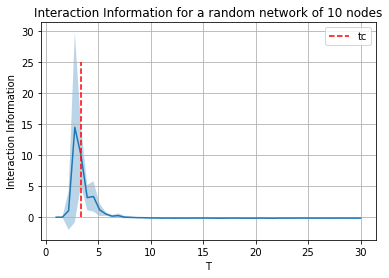

In [5]:
lower_bound = np.subtract(interaction_info, ii_std)
upper_bound = np.add(interaction_info, ii_std)
plt.plot(temperatures, interaction_info)
plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3)

plt.ylabel('Interaction Information')
plt.xlabel('T')
plt.grid()
plt.title(f'Interaction Information for a random network of {n} nodes')
plt.vlines(tc, 0, 25, label='tc', linestyles='dashed', colors='r')
plt.legend()
plt.savefig('Results/10_nodes_II.png', bbox_inches='tight')